## 读取数据
- 在学习R语言过程中，除了使用内置的数据集外，我们更多的需要导入外部数据
### 数据科学中的文件管理
- 把项目所需的文件（代码、数据、图片等），放在一个文件夹里

- 读取文件
  - 事实上，R语言提供了很多读取数据的函数。下表列出了常见文件格式的读取方法

文件格式   |   R函数
----------- | ------------
txt	| read.table()
.csv	| read.csv() and readr::read_csv()
.xls and .xlsx	| readxl::read_excel() and openxlsx::read.xlsx()
.sav(SPSS files)	| haven::read_sav() and foreign::read.spss()
.Rdata or rda	| load()
.rds	| readRDS() and readr::read_rds()
.dta	| haven::read_dta() and haven::read_stata()
.sas7bdat(SAS files)	| haven::read_sas()
Internet	| download.file()

### `here`宏包
- 强大的`here`宏包，`here()`会告诉我们当前所在的目录
- 指向某个文件的路径信息
- `here`宏包的好处还在于，在不同的电脑和文件结构下，代码都能运行

In [2]:
here::here()

[1] "/public/home/sll"

In [4]:
here::here("software", "smoove")
d <- read.table(file= "./data/txt_file.txt", header = TRUE)

[1] "/public/home/sll/software/smoove"

## 数据处理
- 数据处理的工具`dplyr`宏包--tidyverse里的“瑞士军刀”
- `dplyr`定义了数据处理的规范语法，其中主要包含以下10个主要的函数
  - `mutate()`, `select()`, `rename()` , `filter()`
  - `summarise()`, `group_by()`, `arrange()`
  - `left_join()`, `right_join()`， `full_join()`
- `if_else()` `case_when()` `everything()`函数
- `count()` 
  - 对给定条件的某列进行计数，`count(x, condition)`相当于`filter(x,condition) %>% 
  group_by(x) %>% 
  summarise(n=n())`
- `across()`
  - 对给定的某些列赋予函数计算
  - `across(.cols = everything(), .fns = NULL, ..., .names = NULL)`
    - 用在 `mutate()` 和`summarise()` 函数里面
    - `across()` 对**多列**执行**相同**的函数操作，返回数据框
    - `list()`列出多个要使用的函数及对应列名

In [6]:
library(dplyr)

In [15]:
df <- data.frame(
name=c("Alice", "Alice", "Bob", "Bob", "Carol", "Carol"),
type=c("english", "math", "english", "math", "english", "math"),
score=c(80, 60, 70, 69, 80, 90))
df

name,type,score
<chr>,<chr>,<dbl>
Alice,english,80
Alice,math,60
Bob,english,70
Bob,math,69
Carol,english,80
Carol,math,90


### 1 新增一列 `mutata()`
- `mutate()`函数的功能是给数据框新增一列，使用语法为 `mutate(.data = df, name = value)`
  - 第一个参数`.data`，接受要处理的数据框，比如这里的`df`
  - 第二个参数是`Name-value`对, 比如`extra = reward`，
    - 等号左边，是我们为新增的一列取的名字，比如这里的`extra`，因为数据框每一列都是要有名字的；
    - 等号右边，是打算并入数据框的**向量**，比如这里的`reward`，它是装着学生成绩的向量。注意，向量的长度，
      - 要么与数据框的行数等长，比如这里向量长度为6；
      - 要么长度为1，即，新增的这一列所有的值都是一样的(*循环补齐机制*)。

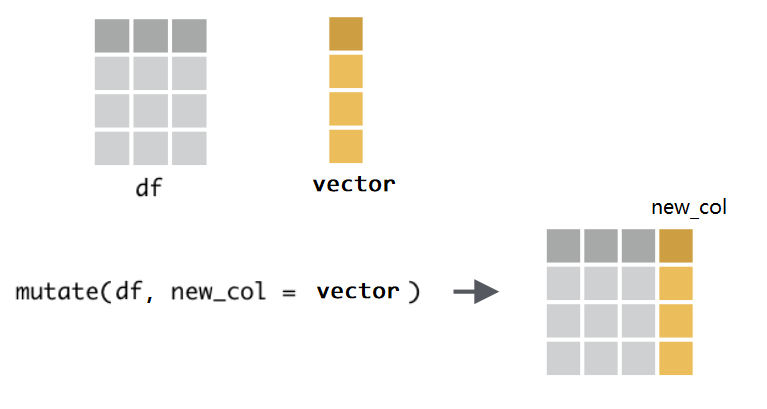

- 因为`mutate()`函数处理的是数据框，并且固定放置在第一位置上（几乎所有`dplyr`的函数都是这样要求的），所以这个`.data`可以偷懒不写，直接写`mutate(df, extra = reward)`。另外，如果想同时新增多个列，只需要提供多个`Name-value`对即可

In [16]:
reward <- c(2, 5, 9, 8, 5, 6)
mutate(df, extra=reward)

name,type,score,extra
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80,2
Alice,math,60,5
Bob,english,70,9
Bob,math,69,8
Carol,english,80,5
Carol,math,90,6


In [17]:
# 新增多列
mutate(df,
      extra1 = c(2, 5, 9, 8, 5, 6),
      extra2 = c(1, 2, 3, 3, 2, 1),
      extra3 = c(8)
      )

name,type,score,extra1,extra2,extra3
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Alice,english,80,2,1,8
Alice,math,60,5,2,8
Bob,english,70,9,3,8
Bob,math,69,8,3,8
Carol,english,80,5,2,8
Carol,math,90,6,1,8


### 2 管道 ` %>% `
- Windows系统中可以通过`Ctrl + Shift + M `快捷键产生` %>%`

In [10]:
c(1:10) %>% sum()

[1] 55

- 这条语句的意思是`f(x)` 写成 `x %>% f()`，这里向量 `c(1:10)` 通过管道操作符 `%>%` ，传递到函数`sum()`的第一个参数位置，即`sum(c(1:10))`
- 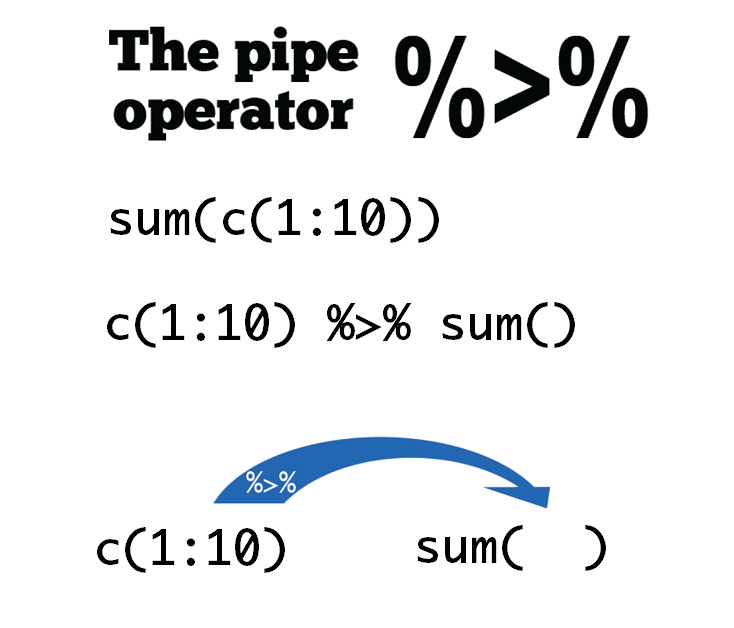

In [18]:
df %>% mutate(extra=reward)

name,type,score,extra
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80,2
Alice,math,60,5
Bob,english,70,9
Bob,math,69,8
Carol,english,80,5
Carol,math,90,6


### 3 向量函数与`mutate()`
- `mutate()`函数的本质还是向量函数和向量化操作，只不过是换作在数据框中完成，这样更能形成“数据框进、数据框出”的思维，方便快捷地构思并统计任务
- 在`mutate()`中引用数据框的某一列名，实际上是引用了列名对应的**整个向量**, 所以，这里我们传递`score`到`calc_square()`，就是把整个`score`向量传递给`calc_square()`.
  - 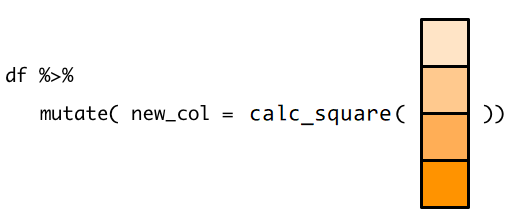
- 几何算符（这里是平方）是向量化的，因此`calc_square()`会对输入的`score`向量，返回一个等长的向量。
  - 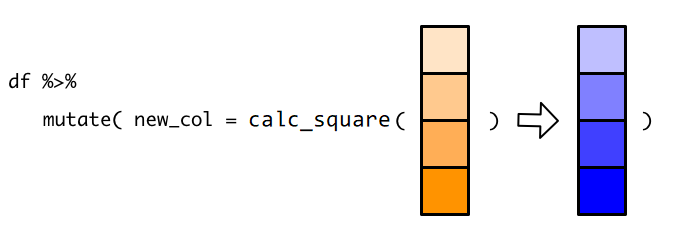
- `mutate()`拿到这个新的向量后，就在原有数据框中添加新的一列`new_col`
  - 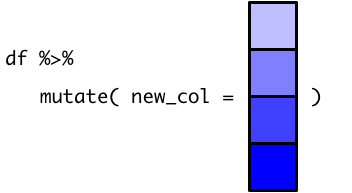

In [19]:
calc_square <- function(x){
    x^2
}
df %>% mutate(new_col = calc_square(score))

name,type,score,new_col
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80,6400
Alice,math,60,3600
Bob,english,70,4900
Bob,math,69,4761
Carol,english,80,6400
Carol,math,90,8100


### 4 保存为新的数据框

In [22]:
df_new <- df %>% 
  mutate(extra = reward) %>% 
  mutate(total = score + extra)
df_new

df_new2 <- df %>% 
  mutate(extra = reward,
        total = score + extra)
df_new2

name,type,score,extra,total
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Alice,english,80,2,82
Alice,math,60,5,65
Bob,english,70,9,79
Bob,math,69,8,77
Carol,english,80,5,85
Carol,math,90,6,96


name,type,score,extra,total
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Alice,english,80,2,82
Alice,math,60,5,65
Bob,english,70,9,79
Bob,math,69,8,77
Carol,english,80,5,85
Carol,math,90,6,96


### 5 选取列 `select()`
- `select()`顾名思义选择，就是选择数据框的某一列，或者某几列。
- 数据框进数据框出是`dplyr`函数的第二个特点
- 删除某列，可以在变量前面加 `-` 或者 `!`，两者的结果是一样的。
- 也可以通过位置索引进行选取
- 如果要选取数据框的列很多，我们也可以先观察列名的特征，用特定的函数进行选取

In [25]:
df_new %>% select(name, extra)

name,extra
<chr>,<dbl>
Alice,2
Alice,5
Bob,9
Bob,8
Carol,5
Carol,6


In [33]:
df_new %>% select(-name)

type,score,extra,total
<chr>,<dbl>,<dbl>,<dbl>
english,80,2,82
math,60,5,65
english,70,9,79
math,69,8,77
english,80,5,85
math,90,6,96


In [35]:
df_new %>% select(1,2,3)
df_new %>% select(1:3)

name,type,score
<chr>,<chr>,<dbl>
Alice,english,80
Alice,math,60
Bob,english,70
Bob,math,69
Carol,english,80
Carol,math,90


name,type,score
<chr>,<chr>,<dbl>
Alice,english,80
Alice,math,60
Bob,english,70
Bob,math,69
Carol,english,80
Carol,math,90


In [42]:
# 如果要选取数据框的列很多，我们也可以先观察列名的特征，用特定的函数进行选取
df_new %>% select(starts_with("s"))
df_new %>% select(ends_with("e"))
df_new %>% select(contains("score"))  # 列名包含
df_new %>% select(where(is.character)) # 通过变量的类型来选取
df_new %>% select(where(is.numeric))
df_new %>% select(where(is.numeric) & starts_with("t"))
df_new %>% select(!starts_with("s"))

score
<dbl>
80
60
70
69
80
90


name,type,score
<chr>,<chr>,<dbl>
Alice,english,80
Alice,math,60
Bob,english,70
Bob,math,69
Carol,english,80
Carol,math,90


score
<dbl>
80
60
70
69
80
90


name,type
<chr>,<chr>
Alice,english
Alice,math
Bob,english
Bob,math
Carol,english
Carol,math


score,extra,total
<dbl>,<dbl>,<dbl>
80,2,82
60,5,65
70,9,79
69,8,77
80,5,85
90,6,96


total
<dbl>
82
65
79
77
85
96


name,type,extra,total
<chr>,<chr>,<dbl>,<dbl>
Alice,english,2,82
Alice,math,5,65
Bob,english,9,79
Bob,math,8,77
Carol,english,5,85
Carol,math,6,96


### 6 修改列名 `rename()`
- 用`rename()`修改列的名字, 具体方法是`rename(.data, new_name = old_name)`，和`mutate()`一样，等号左边是新的变量名，右边是已经存在的变量名（这是`dplyr`函数的第三个特征）

In [43]:
df_new %>% 
  select(name, type, total) %>% 
  rename(total_score = total)

name,type,total_score
<chr>,<chr>,<dbl>
Alice,english,82
Alice,math,65
Bob,english,79
Bob,math,77
Carol,english,85
Carol,math,96


### 7 筛选`filter()`
- 前面`select()`是**列方向的选择**，而用`filter()`函数，我们可以对数据框**行方向**进行筛选，选出符合特定条件的某些行
- 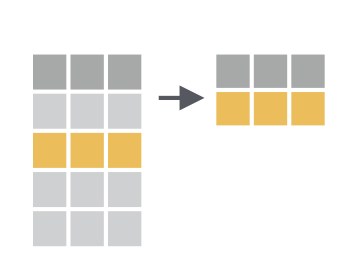
- **注意，这里`filter()`函数不是字面上“过滤掉”的意思，而是保留符合条件的行**，也就说`keep`，不是`drop`的意思。
- `R`提供了其他比较关系的算符: `<`, `>`, `<=`, `>=`, `== `(equal), `!= `(not equal), `%in%`, `is.na()` 和 `!is.na()` .
- 可以限定多个条件进行筛选，支持逻辑运算符
- 可以配合一些函数使用

`filter()`中的逻辑运算符
Operator	|Meaning
---------  | ---------
`==`	|Equal to
`>`	|Greater than
`<`	|Less than
`>=`	|Greater than or equal to
`<=`|Less than or equal to
`!=`	|Not equal to
`%in%`	|in
`is.na`	|is a missing value (NA)
`!is.na`	|is not a missing value
`&`	| and
`\|`	| or

In [48]:
df_new %>% filter(score > 70)

name,type,score,extra,total
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Alice,english,80,2,82
Carol,english,80,5,85
Carol,math,90,6,96


In [51]:
df_new %>% filter(type=="english" & score >= 75)
df_new %>% filter(type=="english", score >= 75)

name,type,score,extra,total
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Alice,english,80,2,82
Carol,english,80,5,85


name,type,score,extra,total
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Alice,english,80,2,82
Carol,english,80,5,85


In [52]:
df_new %>% filter(score == max(score))

name,type,score,extra,total
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Carol,math,90,6,96


### 8 统计汇总`summarise()`
- `summarise()`函数非常强大，主要用于统计汇总，往往与其他函数配合使用

In [54]:
df_new %>% summarise(mean_score = mean(score))
df_new %>% summarise(sd_score = sd(score))

mean_score
<dbl>
74.83333


sd_score
<dbl>
10.59088


In [55]:
df_new %>% summarise(
  mean_score = mean(score),
  median_score = median(score),
  n = n(),
  sum = sum(score))

mean_score,median_score,n,sum
<dbl>,<dbl>,<int>,<dbl>
74.83333,75,6,449


### 9 分组统计 `group_by()`
- 实际运用中，`summarise()`函数往往配合`group_by()`一起使用，即，先分组再统计

In [56]:
df_new %>% 
  group_by(name) %>% 
  summarise(
    mean_score = mean(total),
    sd_score = sd(total))

name,mean_score,sd_score
<chr>,<dbl>,<dbl>
Alice,73.5,12.020815
Bob,78.0,1.414214
Carol,90.5,7.778175


### 10 排序 `arrange()`
- `arrange()`就是按照某个变量进行排序，默认为从小到大排序
- 在要排序的变量前加上`-`可改成从大到小排序
- 使用`desc()`函数也可实现从大到小排序
- 也可对多个变量依次排序

In [59]:
df_new %>% arrange(total)
df_new %>% arrange(-total)
df_new %>% arrange(desc(total))

name,type,score,extra,total
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Alice,math,60,5,65
Bob,math,69,8,77
Bob,english,70,9,79
Alice,english,80,2,82
Carol,english,80,5,85
Carol,math,90,6,96


name,type,score,extra,total
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Carol,math,90,6,96
Carol,english,80,5,85
Alice,english,80,2,82
Bob,english,70,9,79
Bob,math,69,8,77
Alice,math,60,5,65


name,type,score,extra,total
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Carol,math,90,6,96
Carol,english,80,5,85
Alice,english,80,2,82
Bob,english,70,9,79
Bob,math,69,8,77
Alice,math,60,5,65


In [60]:
df_new %>% 
  arrange(type, desc(total))

name,type,score,extra,total
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Carol,english,80,5,85
Alice,english,80,2,82
Bob,english,70,9,79
Carol,math,90,6,96
Bob,math,69,8,77
Alice,math,60,5,65


### 11 左联结 `left_join()`
- 实际操作中，会遇到数据框合并的情形
- `left_join(df1, df2, by = "name")`,`by`指定通过哪一列进行合并,合并按照`df1`进行

In [65]:
df1 <- df_new %>% 
  group_by(name) %>% 
  summarise(
    mean_score = mean(total)
  )
df1

df2 <- tibble(
       name = c("Alice", "Bob", "Dave"),
       age =  c(12, 13, 14)
)
df2
# 使用 left_join()函数 把两个数据框df1和df2合并连接在一起
left_join(df1, df2, by = "name")
df1 %>% left_join(df2, by = "name")

name,mean_score
<chr>,<dbl>
Alice,73.5
Bob,78.0
Carol,90.5


name,age
<chr>,<dbl>
Alice,12
Bob,13
Dave,14


name,mean_score,age
<chr>,<dbl>,<dbl>
Alice,73.5,12
Bob,78.0,13
Carol,90.5,NA


name,mean_score,age
<chr>,<dbl>,<dbl>
Alice,73.5,12
Bob,78.0,13
Carol,90.5,NA


### 12 右联结 `right_join()`
- `right_join(df1, df2, by = "name")`,`by`指定通过哪一列进行合并,合并按照`df2`进行，没有对应信息计为`NA`

In [66]:
df1 %>% right_join(df2, by = "name")

name,mean_score,age
<chr>,<dbl>,<dbl>
Alice,73.5,12
Bob,78.0,13
Dave,NA,14


### 13 满联结 `full_join()`
- 有时候，我们不想丢失项，可以使用`full_join()`，该函数确保条目是完整的，信息缺失的地方为`NA`

In [67]:
df1 %>% full_join(df2, by = "name")

name,mean_score,age
<chr>,<dbl>,<dbl>
Alice,73.5,12
Bob,78.0,13
Carol,90.5,NA
Dave,NA,14


### 14 内联结`inner_join()`
- 只保留`name`条目相同地记录

In [68]:
df1 %>% inner_join(df2, by = "name")

name,mean_score,age
<chr>,<dbl>,<dbl>
Alice,73.5,12
Bob,78.0,13


### 15 筛选联结 `semi_join(x,y)` `anti_join(x,y)`
- 筛选联结，有两个`semi_join(x, y)`和`anti_join(x, y)`，
- 函数不改变数据框`x`的变量的数量，主要影响的是`x`的观测，也就说会剔除一些行，其功能类似`filter()`
- **半联结**`semi_join(x, y)`，保留`name`与`y`的`name`相一致的所有行，可以看作对`x`的筛选
- **反联结**`anti_join(x, y)`，丢弃`name`与`y`的`name`相一致的所有行

In [70]:
df1 %>% semi_join(df2, by="name")
df1 %>% filter(
  name %in% df2$name)

name,mean_score
<chr>,<dbl>
Alice,73.5
Bob,78.0


name,mean_score
<chr>,<dbl>
Alice,73.5
Bob,78.0


In [74]:
df1 %>% anti_join(df2, by="name")
df1 %>% filter(
  ! name %in% df2$name)

name,mean_score
<chr>,<dbl>
Carol,90.5


name,mean_score
<chr>,<dbl>
Carol,90.5


In [78]:
df %>% 
  group_by(name) %>% 
  summarise(mean_score = mean(score))

df %>% 
  group_by(name) %>% 
  mutate(mean_score = mean(score))

name,mean_score
<chr>,<dbl>
Alice,70.0
Bob,69.5
Carol,85.0


name,type,score,mean_score
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80,70.0
Alice,math,60,70.0
Bob,english,70,69.5
Bob,math,69,69.5
Carol,english,80,85.0
Carol,math,90,85.0


## `dplyr`进阶
### 导入数据

In [107]:
library(tidyverse)
library(palmerpenguins)

In [108]:
penguins <- penguins %>% drop_na() 

In [110]:
penguins %>% select(bill_length_mm, bill_depth_mm)
penguins %>% select(starts_with("bill_"))

bill_length_mm,bill_depth_mm
<dbl>,<dbl>
39.1,18.7
39.5,17.4
40.3,18.0
36.7,19.3
39.3,20.6
38.9,17.8
39.2,19.6
41.1,17.6
38.6,21.2


bill_length_mm,bill_depth_mm
<dbl>,<dbl>
39.1,18.7
39.5,17.4
40.3,18.0
36.7,19.3
39.3,20.6
38.9,17.8
39.2,19.6
41.1,17.6
38.6,21.2


In [118]:
penguins %>% select(where(is.numeric))
penguins %>% select(!where(is.character))

bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
<dbl>,<dbl>,<int>,<int>,<int>
39.1,18.7,181,3750,2007
39.5,17.4,186,3800,2007
40.3,18.0,195,3250,2007
36.7,19.3,193,3450,2007
39.3,20.6,190,3650,2007
38.9,17.8,181,3625,2007
39.2,19.6,195,4675,2007
41.1,17.6,182,3200,2007
38.6,21.2,191,3800,2007


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007
Adelie,Torgersen,38.9,17.8,181,3625,female,2007
Adelie,Torgersen,39.2,19.6,195,4675,male,2007
Adelie,Torgersen,41.1,17.6,182,3200,female,2007
Adelie,Torgersen,38.6,21.2,191,3800,male,2007


In [119]:
# 多种组合选择
penguins %>% select(species, starts_with("bill_"))

species,bill_length_mm,bill_depth_mm
<fct>,<dbl>,<dbl>
Adelie,39.1,18.7
Adelie,39.5,17.4
Adelie,40.3,18.0
Adelie,36.7,19.3
Adelie,39.3,20.6
Adelie,38.9,17.8
Adelie,39.2,19.6
Adelie,41.1,17.6
Adelie,38.6,21.2


In [ ]:
## 返回向量
my_tibble[["x"]]
my_tibble$x
my_tibble %>% pull(x)

In [121]:
# 返回数据框
my_tibble["x"]
my_tibble %>% select(x)

In [122]:
tb <- tibble(
  x = 1:5,
  y = 0,
  z = 5:1,
  w = 0
)
tb

x,y,z,w
<int>,<dbl>,<int>,<dbl>
1,0,5,0
2,0,4,0
3,0,3,0
4,0,2,0
5,0,1,0


In [125]:
myfun <- function(x) sum(x) == 0

tb %>% select(where(myfun))

tb %>% select(where(~sum(.x) == 0))

y,w
<dbl>,<dbl>
0,0
0,0
0,0
0,0
0,0


y,w
<dbl>,<dbl>
0,0
0,0
0,0
0,0
0,0


In [128]:
df <- tibble(
  x = c(NA, NA, NA),
  y = c(2, 3, NA),
  z = c(NA, 5, NA)
)
df

df %>% select(where(~ !all(is.na(.x))))
df %>% filter(if_any(everything(), ~ !is.na(.x)))

x,y,z
<lgl>,<dbl>,<dbl>
NA,2,NA
NA,3,5
NA,NA,NA


y,z
<dbl>,<dbl>
2,NA
3,5
NA,NA


x,y,z
<lgl>,<dbl>,<dbl>
NA,2,NA
NA,3,5


In [130]:
penguins %>% filter(species %in% c("Adelie", "Gentoo"))
penguins %>% filter(species == "Adelie" & bill_length_mm > 40)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007
Adelie,Torgersen,38.9,17.8,181,3625,female,2007
Adelie,Torgersen,39.2,19.6,195,4675,male,2007
Adelie,Torgersen,41.1,17.6,182,3200,female,2007
Adelie,Torgersen,38.6,21.2,191,3800,male,2007


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,41.1,17.6,182,3200,female,2007
Adelie,Torgersen,42.5,20.7,197,4500,male,2007
Adelie,Torgersen,46.0,21.5,194,4200,male,2007
Adelie,Biscoe,40.6,18.6,183,3550,male,2007
Adelie,Biscoe,40.5,17.9,187,3200,female,2007
Adelie,Biscoe,40.5,18.9,180,3950,male,2007
Adelie,Dream,40.9,18.9,184,3900,male,2007
Adelie,Dream,42.2,18.5,180,3550,female,2007


In [132]:
penguins %>%
  filter(species == "Adelie", bill_length_mm == max(bill_length_mm))

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>


### 更多应用
- `head()`
- `tail()`
- `slice()` 取表格前几行，可与`group_by()`等其他函数连用

In [139]:
penguins %>% head()
penguins %>% tail()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007
Adelie,Torgersen,38.9,17.8,181,3625,female,2007


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Chinstrap,Dream,45.7,17.0,195,3650,female,2009
Chinstrap,Dream,55.8,19.8,207,4000,male,2009
Chinstrap,Dream,43.5,18.1,202,3400,female,2009
Chinstrap,Dream,49.6,18.2,193,3775,male,2009
Chinstrap,Dream,50.8,19.0,210,4100,male,2009
Chinstrap,Dream,50.2,18.7,198,3775,female,2009


In [136]:
penguins %>% slice(1)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007


In [137]:
penguins %>% 
  group_by(species) %>% 
  slice(1)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Chinstrap,Dream,46.5,17.9,192,3500,female,2007
Gentoo,Biscoe,46.1,13.2,211,4500,female,2007


In [142]:
penguins %>% filter(bill_length_mm == max(bill_length_mm))

penguins %>% 
  arrange(desc(bill_length_mm)) %>% 
  slice(1)

penguins %>% 
  slice_max(bill_length_mm)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Gentoo,Biscoe,59.6,17,230,6050,male,2007


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Gentoo,Biscoe,59.6,17,230,6050,male,2007


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Gentoo,Biscoe,59.6,17,230,6050,male,2007


### separate
- 按照某个分隔符分开某一列

In [144]:
tb <- tibble::tribble(
  ~day, ~price,
  1,   "30-45",
  2,   "40-95",
  3,   "89-65",
  4,   "45-63",
  5,   "52-42"
)
tb
tb1 <- tb %>% 
  separate(price, into=c("low", "high"), sep="-")
tb1

day,price
<dbl>,<chr>
1,30-45
2,40-95
3,89-65
4,45-63
5,52-42


day,low,high
<dbl>,<chr>,<chr>
1,30,45
2,40,95
3,89,65
4,45,63
5,52,42


### unite
- 将指定的列按照指定的连接符连接组成新的列
- `remove=FALSE`，不移除被连接的都列

In [149]:
tb1 %>% unite(col="prics", c(low, high), sep=":", remove=FALSE)
tb1 %>% unite("prics", c(low, high), sep=":")

day,prics,low,high
<dbl>,<chr>,<chr>,<chr>
1,30:45,30,45
2,40:95,40,95
3,89:65,89,65
4,45:63,45,63
5,52:42,52,42


day,prics
<dbl>,<chr>
1,30:45
2,40:95
3,89:65
4,45:63
5,52:42


### distinct
- `distinct()`处理的对象是`data.frame`；
- 功能是筛选不重复的`row`；返回`data.frame`
- `n_distinct()`处理的对象是`vector`；功能是统计不同的元素有多少个；返回一个数值

In [159]:
df <- tibble::tribble(
  ~x, ~y, ~z,
  1, 1, 1,
  1, 1, 2,
  1, 1, 1,
  2, 1, 2,
  1, 1, 3,
  3, 3, 1)
df

x,y,z
<dbl>,<dbl>,<dbl>
1,1,1
1,1,2
1,1,1
2,1,2
1,1,3
3,3,1


In [160]:
df %>% distinct()
df %>% distinct(x)
df %>% distinct(x, y)
df %>% distinct(x, y, .keep_all = TRUE) # 只保留最先出现的row

x,y,z
<dbl>,<dbl>,<dbl>
1,1,1
1,1,2
2,1,2
1,1,3
3,3,1


x
<dbl>
1
2
3


x,y
<dbl>,<dbl>
1,1
2,1
3,3


x,y,z
<dbl>,<dbl>,<dbl>
1,1,1
2,1,2
3,3,1


In [161]:
df %>% distinct(
  across(c(x, y)),
  .keep_all = TRUE)

df %>%
  group_by(x) %>%
  distinct(y, .keep_all = TRUE)

x,y,z
<dbl>,<dbl>,<dbl>
1,1,1
2,1,2
3,3,1


x,y,z
<dbl>,<dbl>,<dbl>
1,1,1
2,1,2
3,3,1


In [163]:
df %>% group_by(x) %>% summarise(n = n_distinct(z))

x,n
<dbl>,<int>
1,3
2,1
3,1


### 有关NA的计算
- `NA`很讨厌，凡是它参与的四则运算，结果都是`NA`，
- 所以需要事先把它删除，增加参数说明 `na.rm = TRUE`

In [165]:
sum(c(1, 2, NA, 4))
sum(c(1, 2, NA, 4), na.rm=TRUE)

[1] NA

[1] 7

In [166]:
penguins %>% 
  mutate(
    body = if_else(body_mass_g > 4200, "you are fat", "you are fine"))

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<chr>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007,you are fine
Adelie,Torgersen,39.5,17.4,186,3800,female,2007,you are fine
Adelie,Torgersen,40.3,18.0,195,3250,female,2007,you are fine
Adelie,Torgersen,36.7,19.3,193,3450,female,2007,you are fine
Adelie,Torgersen,39.3,20.6,190,3650,male,2007,you are fine
Adelie,Torgersen,38.9,17.8,181,3625,female,2007,you are fine
Adelie,Torgersen,39.2,19.6,195,4675,male,2007,you are fat
Adelie,Torgersen,41.1,17.6,182,3200,female,2007,you are fine
Adelie,Torgersen,38.6,21.2,191,3800,male,2007,you are fine


In [167]:
df <- tibble::tribble(
    ~name,     ~type, ~score,
  "Alice", "english",    80,
  "Alice",    "math",    NA,
    "Bob", "english",    70,
    "Bob",    "math",    69,
  "Carol", "english",    NA,
  "Carol",    "math",    90
  )
df

name,type,score
<chr>,<chr>,<dbl>
Alice,english,80
Alice,math,NA
Bob,english,70
Bob,math,69
Carol,english,NA
Carol,math,90


In [177]:
df %>% 
  group_by(type) %>% 
  mutate(mean_score = mean(score, na.rm=TRUE)) %>% 
  mutate(new_score = if_else(is.na(score), mean_score, score))

name,type,score,mean_score,new_score
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Alice,english,80,75.0,80.0
Alice,math,NA,79.5,79.5
Bob,english,70,75.0,70.0
Bob,math,69,79.5,69.0
Carol,english,NA,75.0,75.0
Carol,math,90,79.5,90.0


In [178]:
penguins %>% 
  mutate(
    body = case_when(
      body_mass_g < 3500   ~ "best",
      body_mass_g >= 3500 & body_mass_g < 4500  ~ "good",
      body_mass_g >= 4500 & body_mass_g < 5500 ~ "general",
      TRUE                                     ~ "other"))

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<chr>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007,good
Adelie,Torgersen,39.5,17.4,186,3800,female,2007,good
Adelie,Torgersen,40.3,18.0,195,3250,female,2007,best
Adelie,Torgersen,36.7,19.3,193,3450,female,2007,best
Adelie,Torgersen,39.3,20.6,190,3650,male,2007,good
Adelie,Torgersen,38.9,17.8,181,3625,female,2007,good
Adelie,Torgersen,39.2,19.6,195,4675,male,2007,general
Adelie,Torgersen,41.1,17.6,182,3200,female,2007,best
Adelie,Torgersen,38.6,21.2,191,3800,male,2007,good


In [179]:
penguins %>% 
  mutate(degree = case_when(
                  bill_length_mm < 35                        ~ "A",
      bill_length_mm >= 35 & bill_length_mm < 45 ~ "B",
      bill_length_mm >= 45 & bill_length_mm < 55 ~ "C",
      TRUE                                       ~ "D"))

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,degree
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<chr>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007,B
Adelie,Torgersen,39.5,17.4,186,3800,female,2007,B
Adelie,Torgersen,40.3,18.0,195,3250,female,2007,B
Adelie,Torgersen,36.7,19.3,193,3450,female,2007,B
Adelie,Torgersen,39.3,20.6,190,3650,male,2007,B
Adelie,Torgersen,38.9,17.8,181,3625,female,2007,B
Adelie,Torgersen,39.2,19.6,195,4675,male,2007,B
Adelie,Torgersen,41.1,17.6,182,3200,female,2007,B
Adelie,Torgersen,38.6,21.2,191,3800,male,2007,B


### 拓展函数
- `n()`函数，统计当前分组数据框的行数
- 统计某个变量中各组出现的次数，可以使用`count()`函数, 可以统计不同组合出现的次数
- 可以在`count()`里构建新变量，并利用这个新变量完成统计

In [182]:
penguins %>% summarise(n = n())

n
<int>
333


In [183]:
penguins %>% group_by(species) %>% summarise(n = n())

species,n
<fct>,<int>
Adelie,146
Chinstrap,68
Gentoo,119


In [188]:
penguins %>% count(species)
penguins %>% count(sex, sort = TRUE)
penguins %>% count(island, species)

species,n
<fct>,<int>
Adelie,146
Chinstrap,68
Gentoo,119


sex,n
<fct>,<int>
male,168
female,165


island,species,n
<fct>,<fct>,<int>
Biscoe,Adelie,44
Biscoe,Gentoo,119
Dream,Adelie,55
Dream,Chinstrap,68
Torgersen,Adelie,47


In [191]:
penguins %>% filter(bill_length_mm > 40) %>% summarise(n = n())
penguins %>% count(longer_bill = bill_length_mm > 40)

n
<int>
237


longer_bill,n
<lgl>,<int>
FALSE,96
TRUE,237


### 强制转换
- 矢量中的元素必须是相同的类型，但如果不一样呢，会发生什么？ 这个时候R会强制转换成相同的类型。这就涉及数据类型的转换层级
  - character > numeric > logical
  - double > integer

In [1]:
c("foo", 1, TRUE) # 强制转换成了字符串类型

[1] "foo"  "1"    "TRUE"

In [23]:
penguins %>% 
  mutate(is_bigger40 = bill_length_mm > 40) %>% 
  summarise(n = n())

penguins %>% 
  filter(bill_length_mm > 40) %>% 
  summarise(n = n())

n
<int>
344


n
<int>
242


### `across()`函数
- 更安全、更简练的写法

In [26]:
penguins %>% 
  summarise(
    length = mean(bill_length_mm, na.rm=TRUE))

length
<dbl>
43.92193


In [31]:
penguins %>% 
  summarise(
    length = mean(bill_length_mm, na.rm=TRUE),
    depth = mean(bill_depth_mm, na.rm=TRUE)
  )

length,depth
<dbl>,<dbl>
43.92193,17.15117


In [33]:
penguins %>% 
  summarise(
    across(c(bill_depth_mm, bill_length_mm), mean, na.rm=TRUE)
  )

bill_depth_mm,bill_length_mm
<dbl>,<dbl>
17.15117,43.92193


In [34]:
penguins %>% 
  summarise(
    across(ends_with("_mm"), mean, na.rm=TRUE))

bill_length_mm,bill_depth_mm,flipper_length_mm
<dbl>,<dbl>,<dbl>
43.92193,17.15117,200.9152


### 数据中心化
看数据的离散

In [35]:
penguins %>% 
  mutate(
    bill_length_mm = bill_length_mm - mean(bill_length_mm, na.rm=TRUE),
    bill_depth_mm = bill_depth_mm - mean(bill_depth_mm, na.rm=TRUE))

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,-4.82193,1.54883041,181,3750,male,2007
Adelie,Torgersen,-4.42193,0.24883041,186,3800,female,2007
Adelie,Torgersen,-3.62193,0.84883041,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,-7.22193,2.14883041,193,3450,female,2007
Adelie,Torgersen,-4.62193,3.44883041,190,3650,male,2007
Adelie,Torgersen,-5.02193,0.64883041,181,3625,female,2007
Adelie,Torgersen,-4.72193,2.44883041,195,4675,male,2007
Adelie,Torgersen,-9.82193,0.94883041,193,3475,NA,2007


In [36]:
centralized <- function(x){
    x - mean(x, na.rm=TRUE)
}

penguins %>% 
  mutate(
    across(c(bill_length_mm, bill_depth_mm), centralized))

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,-4.82193,1.54883041,181,3750,male,2007
Adelie,Torgersen,-4.42193,0.24883041,186,3800,female,2007
Adelie,Torgersen,-3.62193,0.84883041,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,-7.22193,2.14883041,193,3450,female,2007
Adelie,Torgersen,-4.62193,3.44883041,190,3650,male,2007
Adelie,Torgersen,-5.02193,0.64883041,181,3625,female,2007
Adelie,Torgersen,-4.72193,2.44883041,195,4675,male,2007
Adelie,Torgersen,-9.82193,0.94883041,193,3475,NA,2007


### 数据标准化
- `(x - mean(x))/sd(x)`
- 那一列数据的每个值都减去平均值再除以标准差

In [37]:
std <- function(x){
    (x-mean(x, na.rm=TRUE)) / sd(x, na.rm=TRUE)
}
penguins %>% 
  mutate(
    across(c(bill_length_mm, bill_depth_mm), std)
  )

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,-0.8832047,0.78430007,181,3750,male,2007
Adelie,Torgersen,-0.8099390,0.12600328,186,3800,female,2007
Adelie,Torgersen,-0.6634077,0.42983257,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,-1.3227986,1.08812936,193,3450,female,2007
Adelie,Torgersen,-0.8465718,1.74642615,190,3650,male,2007
Adelie,Torgersen,-0.9198375,0.32855614,181,3625,female,2007
Adelie,Torgersen,-0.8648883,1.24004400,195,4675,male,2007
Adelie,Torgersen,-1.7990254,0.48047078,193,3475,NA,2007


In [43]:
penguins %>% 
  mutate(
    across(c(bill_length_mm, bill_depth_mm), 
           ~(.x - mean(.x, na.rm=TRUE)) / sd(.x, na.rm=TRUE))
  )

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,-0.8832047,0.78430007,181,3750,male,2007
Adelie,Torgersen,-0.8099390,0.12600328,186,3800,female,2007
Adelie,Torgersen,-0.6634077,0.42983257,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,-1.3227986,1.08812936,193,3450,female,2007
Adelie,Torgersen,-0.8465718,1.74642615,190,3650,male,2007
Adelie,Torgersen,-0.9198375,0.32855614,181,3625,female,2007
Adelie,Torgersen,-0.8648883,1.24004400,195,4675,male,2007
Adelie,Torgersen,-1.7990254,0.48047078,193,3475,NA,2007


### 多列多个统计函数

In [44]:
penguins %>% 
  group_by(species) %>% 
  summarise(
    across(ends_with("_mm"), list(mean = mean, sd = sd), na.rm=TRUE))

species,bill_length_mm_mean,bill_length_mm_sd,bill_depth_mm_mean,bill_depth_mm_sd,flipper_length_mm_mean,flipper_length_mm_sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Adelie,38.79139,2.663405,18.34636,1.2166498,189.9536,6.539457
Chinstrap,48.83382,3.339256,18.42059,1.1353951,195.8235,7.131894
Gentoo,47.50488,3.081857,14.98211,0.9812198,217.1870,6.484976


In [45]:
penguins %>% 
  group_by(sex) %>% 
  summarise(
    across(starts_with("bill_"), list(max = max, min = min), na.rm=TRUE))

sex,bill_length_mm_max,bill_length_mm_min,bill_depth_mm_max,bill_depth_mm_min
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
female,58.0,32.1,20.7,13.1
male,59.6,34.6,21.5,14.1
NA,47.3,34.1,20.2,13.8


## 数据规整
- 1 宽表格变长表格`gather()` `pivot_longer()`, 推荐`pivot_longer()`
  - 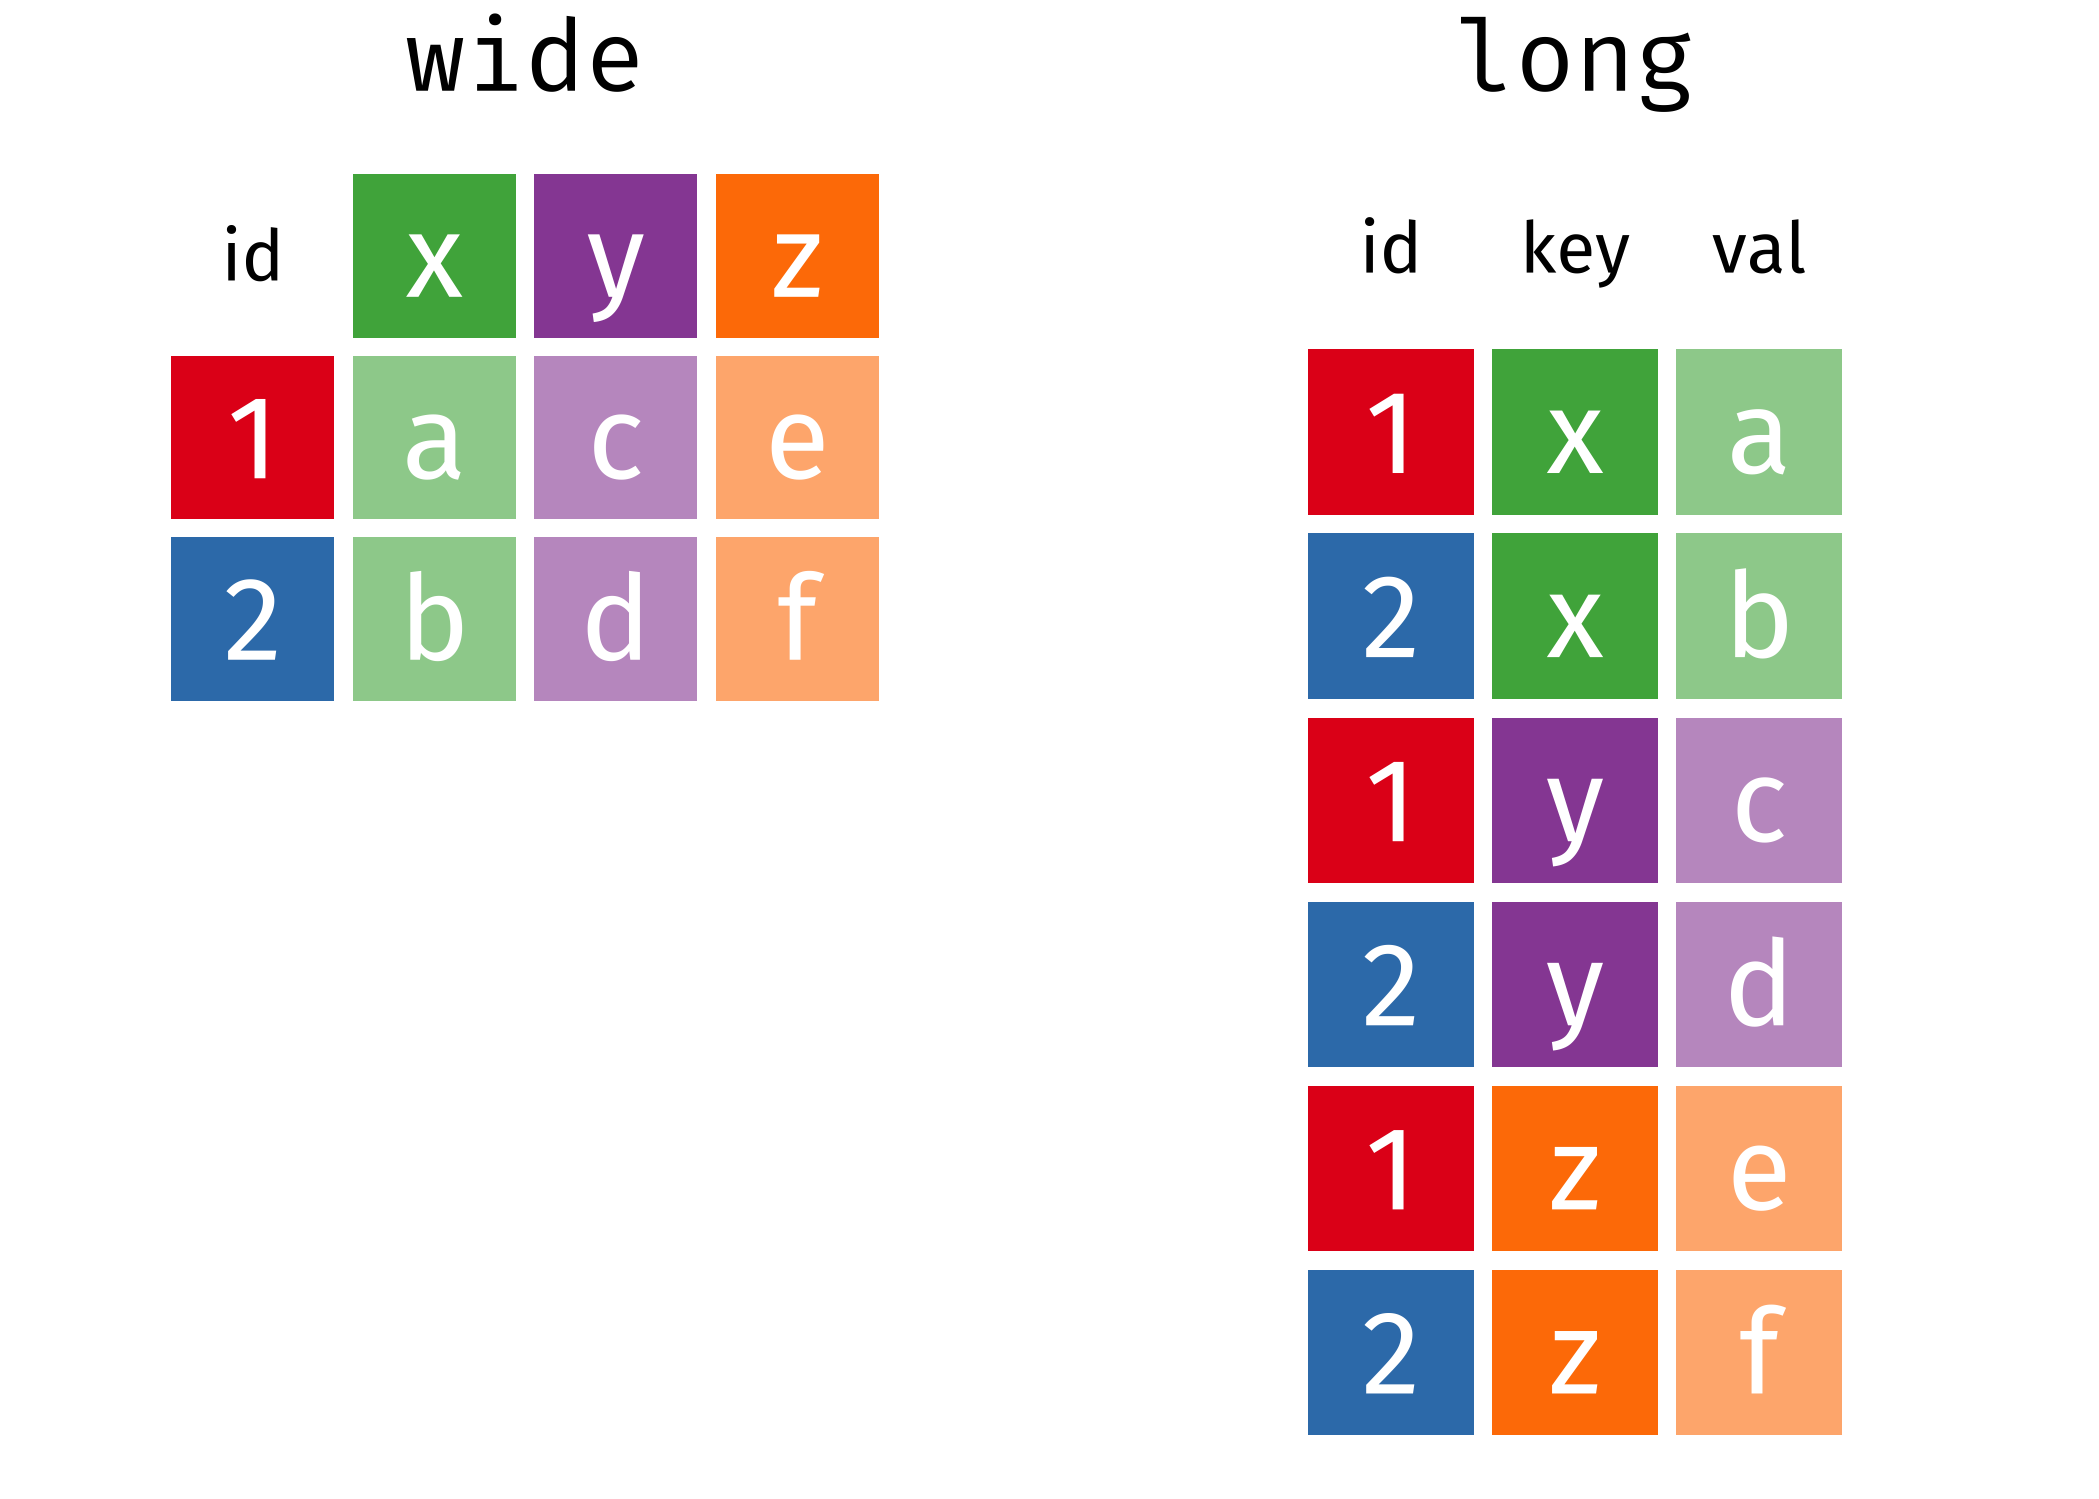
  - 参数`cols`，表示哪些列需要转换.
  - 参数`names_to`，表示`cols`选取的这些列的名字，构成了新的一列，这里需要取一个名字.
  - 参数`values_to`， 表示`cols`选取的这些列的值，构成了新的一列，这里也需要取一个名字.
  - 数据框总的信息量不会丢失
- 2 长表格变宽表格`spread()` `pivot_wider()`

In [63]:
library(tidyverse)

In [48]:
plant_height <- data.frame(
  Day = 1:5,
  A = c(0.7, 1.0, 1.5, 1.8, 2.2),
  B = c(0.5, 0.7, 0.9, 1.3, 1.8),
  C = c(0.3, 0.6, 1.0, 1.2, 2.2),
  D = c(0.4, 0.7, 1.2, 1.5, 3.2)
)


plant_height

Day,A,B,C,D
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7,0.5,0.3,0.4
2,1.0,0.7,0.6,0.7
3,1.5,0.9,1.0,1.2
4,1.8,1.3,1.2,1.5
5,2.2,1.8,2.2,3.2


In [49]:
melted <- plant_height %>% 
  pivot_longer(cols = A:D,   # -Day or c(A, B, C, D) or c("A", "B", "C", "D")
               names_to = "plant",
               values_to = "height")
melted

melted1 <- gather(plant_height, variable, value, A:D)
melted1

Day,plant,height
<int>,<chr>,<dbl>
1,A,0.7
1,B,0.5
1,C,0.3
1,D,0.4
2,A,1.0
2,B,0.7
2,C,0.6
2,D,0.7
3,A,1.5


Day,variable,value
<int>,<chr>,<dbl>
1,A,0.7
2,A,1.0
3,A,1.5
4,A,1.8
5,A,2.2
1,B,0.5
2,B,0.7
3,B,0.9
4,B,1.3


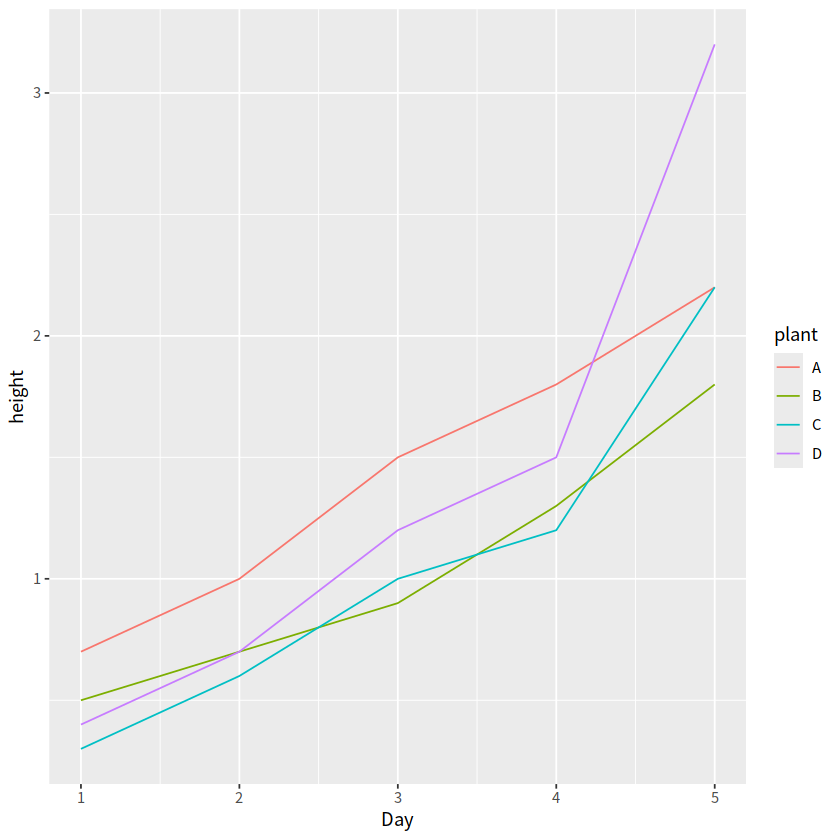

In [50]:
melted %>% 
  ggplot(aes(x=Day, y=height, color=plant))+
  geom_line()

In [51]:
wide <- melted %>% 
  pivot_wider(
  names_from = "plant",
  values_from = "height"
)
wide

Day,A,B,C,D
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7,0.5,0.3,0.4
2,1.0,0.7,0.6,0.7
3,1.5,0.9,1.0,1.2
4,1.8,1.3,1.2,1.5
5,2.2,1.8,2.2,3.2


- 列名转换成多个变量
  - `pivot_longer()`中的`names_pattern = `指定表头属性
  - `pivot_wider()`中的`names_glue = `指定转变后表头样式

In [52]:
plant_record <- data.frame(
         day = c(1L, 2L, 3L, 4L, 5L),
    A_height = c(1.1, 1.2, 1.3, 1.4, 1.5),
     A_width = c(2.1, 2.2, 2.3, 2.4, 2.5),
     A_depth = c(3.1, 3.2, 3.3, 3.4, 3.5),
    B_height = c(4.1, 4.2, 4.3, 4.4, 4.5),
     B_width = c(5.1, 5.2, 5.3, 5.4, 5.5),
     B_depth = c(6.1, 6.2, 6.3, 6.4, 6.5),
    C_height = c(7.1, 7.2, 7.3, 7.4, 7.5),
     C_width = c(8.1, 8.2, 8.3, 8.4, 8.5),
     C_depth = c(9.1, 9.2, 9.3, 9.4, 9.5)
)
plant_record

day,A_height,A_width,A_depth,B_height,B_width,B_depth,C_height,C_width,C_depth
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1
2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2
3,1.3,2.3,3.3,4.3,5.3,6.3,7.3,8.3,9.3
4,1.4,2.4,3.4,4.4,5.4,6.4,7.4,8.4,9.4
5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5


我们想原始数据框的列名，转换成多个变量，比如A,B,C成为物种(species)变量，（height, width, depth）成为`parameter`变量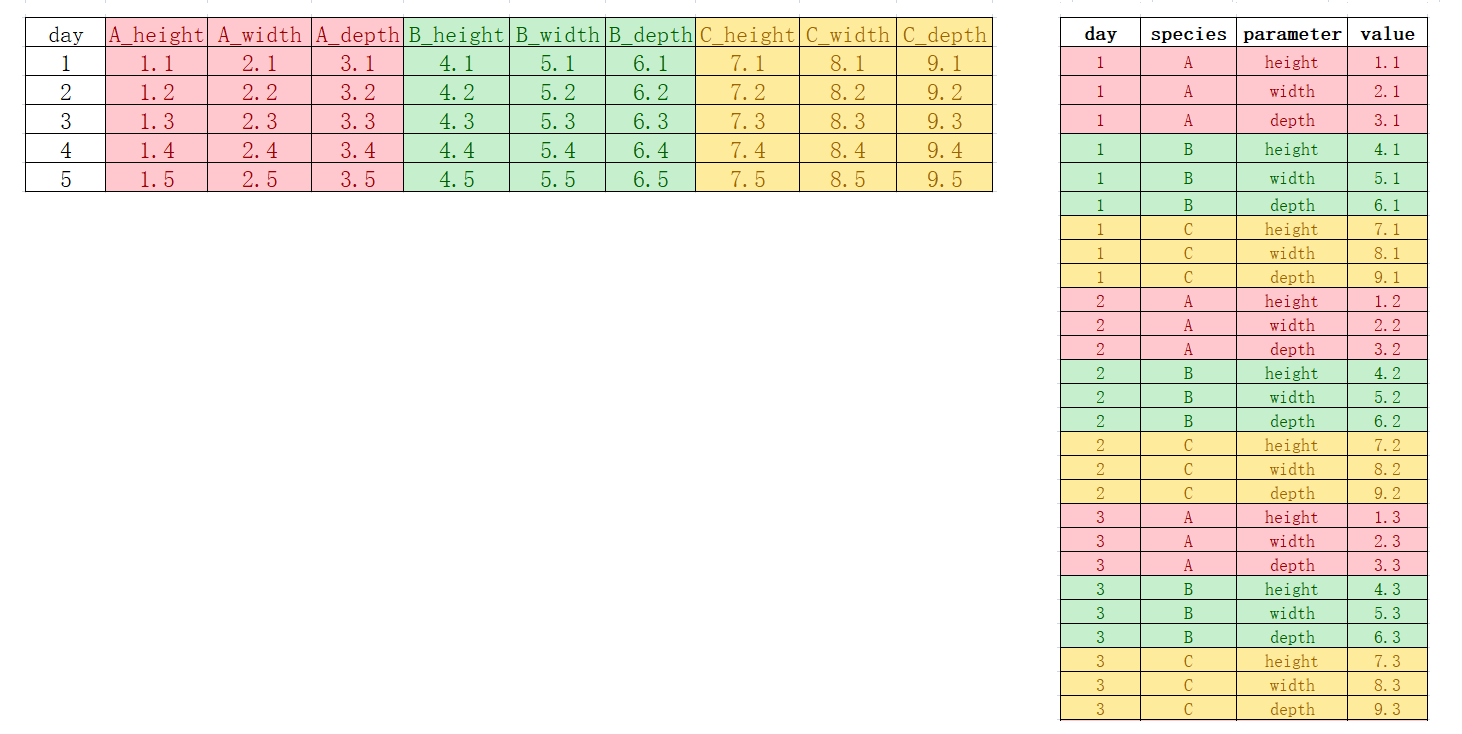

我们希望原始数据框的列名中，一部分进入变量，一部分保持原来的列名，比如，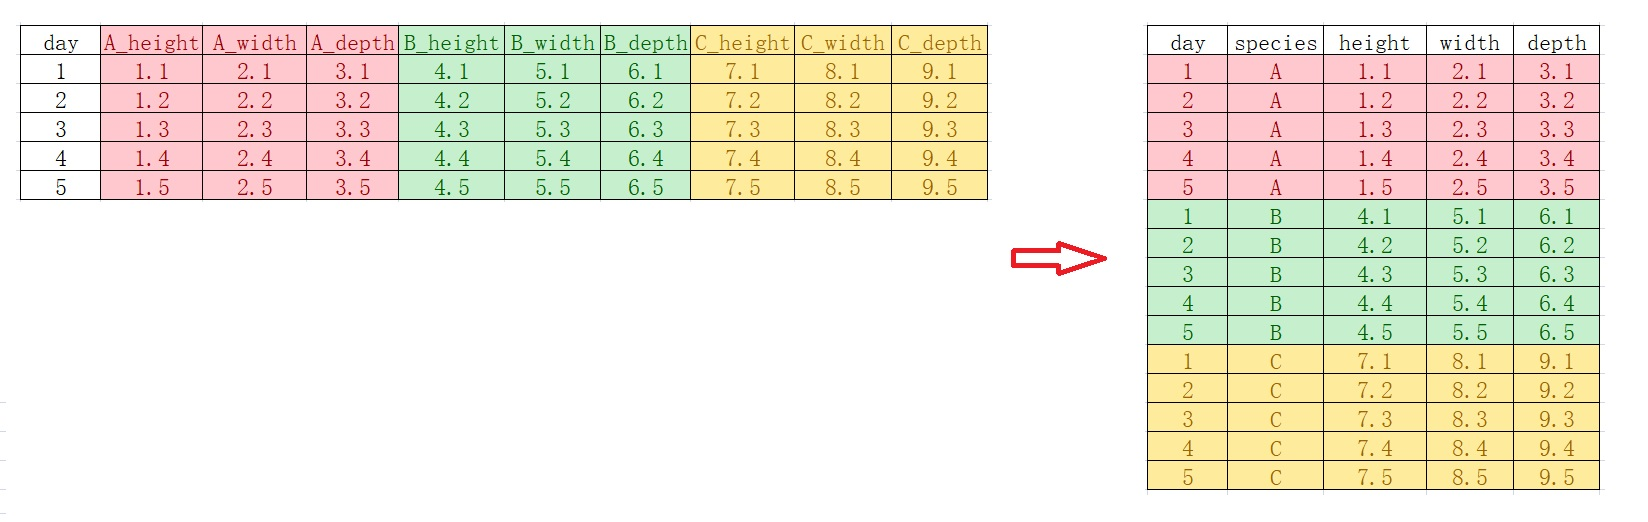

In [53]:
## pivot_longer()函数的实现列名转换成多个变量
plant_record %>% 
  tidyr::pivot_longer(cols = !day,
                      names_to = c("species", "parameter"),
                      names_pattern = "(.*)_(.*)",
                      values_to = "value")

## pivot_longer()函数实现部分列名转变成变量，部分保持原来的列名
plant_record_longer <- plant_record %>% 
  tidyr::pivot_longer(cols = !day,
                      names_to = c("species",".value"),
                      names_pattern = "(.*)_(.*)")
plant_record_longer
# 注意 .value 而不是value，说明这里不是单个列名，
# 而是匹配得到的多个值做列名

day,species,parameter,value
<int>,<chr>,<chr>,<dbl>
1,A,height,1.1
1,A,width,2.1
1,A,depth,3.1
1,B,height,4.1
1,B,width,5.1
1,B,depth,6.1
1,C,height,7.1
1,C,width,8.1
1,C,depth,9.1


day,species,height,width,depth
<int>,<chr>,<dbl>,<dbl>,<dbl>
1,A,1.1,2.1,3.1
1,B,4.1,5.1,6.1
1,C,7.1,8.1,9.1
2,A,1.2,2.2,3.2
2,B,4.2,5.2,6.2
2,C,7.2,8.2,9.2
3,A,1.3,2.3,3.3
3,B,4.3,5.3,6.3
3,C,7.3,8.3,9.3


- 变回去
  - 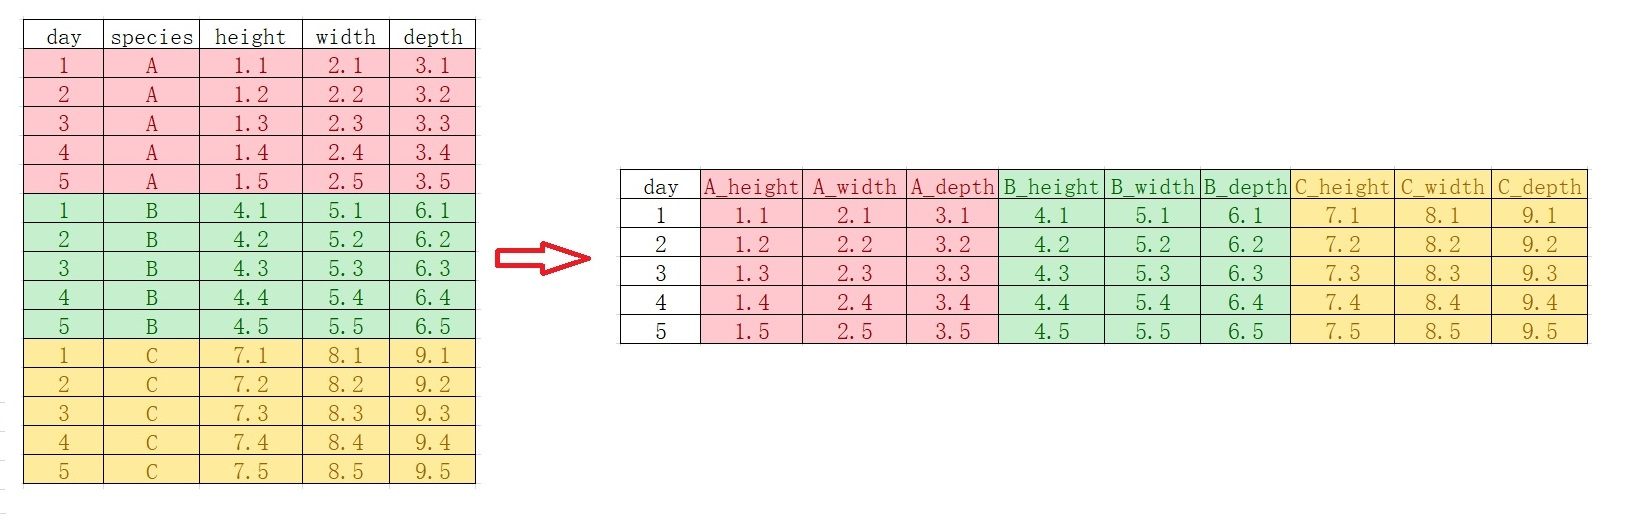

In [ ]:
us_rent_income %>%
    pivot_wider(
      names_from = variable,
      names_glue = "{variable}_{.value}",
      values_from = c(estimate, moe))

  - 注意 `.value` 而不是`value`，说明这里不是单个列名，而是匹配得到的多个值做列名

In [54]:
plant_record_longer %>% 
  pivot_wider(names_from = species,
              values_from = c(height, width, depth),
              names_glue = "{species}_{.value}")

day,A_height,B_height,C_height,A_width,B_width,C_width,A_depth,B_depth,C_depth
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.1,4.1,7.1,2.1,5.1,8.1,3.1,6.1,9.1
2,1.2,4.2,7.2,2.2,5.2,8.2,3.2,6.2,9.2
3,1.3,4.3,7.3,2.3,5.3,8.3,3.3,6.3,9.3
4,1.4,4.4,7.4,2.4,5.4,8.4,3.4,6.4,9.4
5,1.5,4.5,7.5,2.5,5.5,8.5,3.5,6.5,9.5


## `tidy data`原则
- Hadley Wickhamt提出了数据科学tidy原则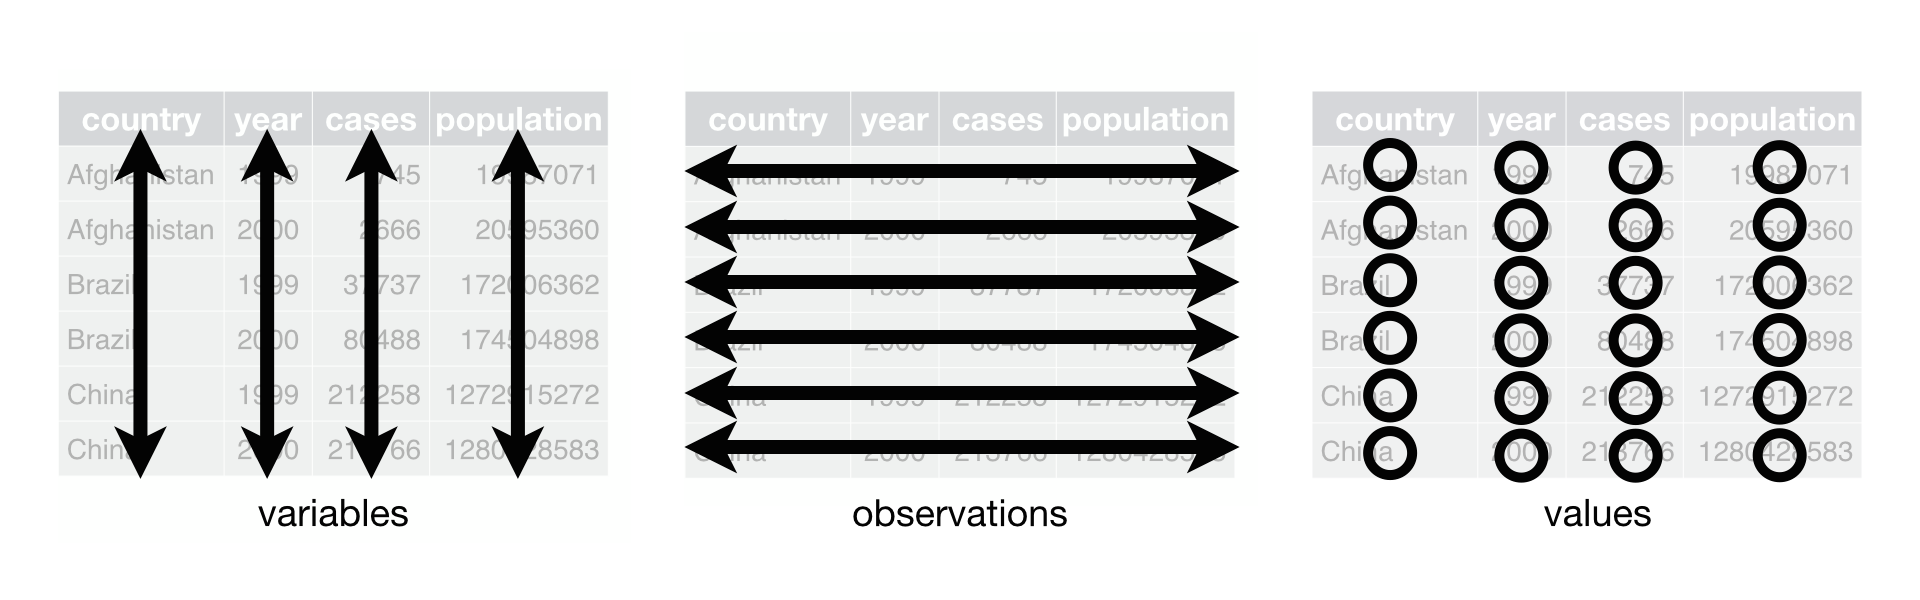
  - 一切都是数据框，任何数据都可以规整
  - 数据框的一列代表一个**变量**，数据框的一行代表一次**观察**
  - 函数处理数据时，数据框进数据框出（函数的第一个参数始终为**数据框**）

根据Hadley Wickham的思想，这里的宽表格(`plant_heigt`和 `wide`)不是`tidy`的，只有长表格(long)才是`tidy`的，

In [55]:
melted

Day,plant,height
<int>,<chr>,<dbl>
1,A,0.7
1,B,0.5
1,C,0.3
1,D,0.4
2,A,1.0
2,B,0.7
2,C,0.6
2,D,0.7
3,A,1.5


## `fill()`缺失值填充
- 根据最近进行补齐
- 可以控制填充的方向`.direction = "up"`

In [56]:
sales <- tibble::tribble(
  ~quarter, ~year, ~sales,
      "Q1",  2000,  66013,
      "Q2",    NA,  69182,
      "Q3",    NA,  53175,
      "Q4",    NA,  21001,
      "Q1",  2001,  46036,
      "Q2",    NA,  58842,
      "Q3",    NA,  44568,
      "Q4",    NA,  50197,
      "Q1",  2002,  39113,
      "Q2",    NA,  41668,
      "Q3",    NA,  30144,
      "Q4",    NA,  52897
  )
sales

quarter,year,sales
<chr>,<dbl>,<dbl>
Q1,2000,66013
Q2,NA,69182
Q3,NA,53175
Q4,NA,21001
Q1,2001,46036
Q2,NA,58842
Q3,NA,44568
Q4,NA,50197
Q1,2002,39113


In [57]:
sales %>% fill(year)
sales %>% fill(year, .direction="up") 

quarter,year,sales
<chr>,<dbl>,<dbl>
Q1,2000,66013
Q2,2000,69182
Q3,2000,53175
Q4,2000,21001
Q1,2001,46036
Q2,2001,58842
Q3,2001,44568
Q4,2001,50197
Q1,2002,39113


quarter,year,sales
<chr>,<dbl>,<dbl>
Q1,2000,66013
Q2,2001,69182
Q3,2001,53175
Q4,2001,21001
Q1,2001,46036
Q2,2002,58842
Q3,2002,44568
Q4,2002,50197
Q1,2002,39113


## `expand() `与 `complete()`
- `expand()`指定数据框的若干列，根据其向量元素值，产生所有可能的交叉组合
  - `nesting()`用于限定只产生数据框已出现的组合
- `complete()`补全，可以看作是`expand(nesting()) + fill()`
  - 数据在`complete`补全的时候，会面临有两种缺失值：
    - 1 补位的时候造成的空缺
    - 2 数据原先就存在缺失值
    - 3 补位的时候造成的空缺，可通过`fill = list(x = 0)`控制填充
    - 4 数据原先就存在缺失值，最好通过 `explicit = FALSE`显式地控制是否填充

In [58]:
df <- tibble::tribble(
  ~x, ~y, ~z,
  1L, 1L, 4L,
  1L, 2L, 5L,
  2L, 1L, NA,
  3L, 2L, 6L
)
df
df %>% expand(x,y)
df %>% expand(nesting(x,y))
df %>% expand(nesting(x,y), z)

x,y,z
<int>,<int>,<int>
1,1,4
1,2,5
2,1,NA
3,2,6


x,y
<int>,<int>
1,1
1,2
2,1
2,2
3,1
3,2


x,y
<int>,<int>
1,1
1,2
2,1
3,2


x,y,z
<int>,<int>,<int>
1,1,4
1,1,5
1,1,6
1,1,NA
1,2,4
1,2,5
1,2,6
1,2,NA
2,1,4


In [59]:
df %>% complete(x, y)
df %>% complete(x, y, fill=list(z=0))
df %>% complete(x, y, fill = list(z = 0), explicit = FALSE)

x,y,z
<int>,<int>,<int>
1,1,4
1,2,5
2,1,NA
2,2,NA
3,1,NA
3,2,6


x,y,z
<int>,<int>,<int>
1,1,4
1,2,5
2,1,0
2,2,0
3,1,0
3,2,6


x,y,z
<int>,<int>,<int>
1,1,4
1,2,5
2,1,NA
2,2,0
3,1,0
3,2,6


## `expand_grid() `与` crossing()`
- `expand_grid()`产生一个新的数据框，每行对应着向量元素的所有交叉组合
- 向量换成数据框也可以，其结果就是数据框行与元素的交叉组合
- `crossing()`可以看作是`expand_grid() + distinct()`， 即`crossing()`在完成交叉组合之后会自动去重

In [67]:
expand_grid(x=c(1,1,2), y= 1:2)
crossing(x=c(1,1,2), y=1:2)

x,y
<dbl>,<int>
1,1
1,2
1,1
1,2
2,1
2,2


x,y
<dbl>,<int>
1,1
1,2
2,1
2,2


## `separate()`与`unite()`
- 以提供的分隔符分隔或合并某些列
- 有时候分隔符搞不定的，可以用正则表达式，将捕获的每组弄成一列

In [71]:
tb <- tibble::tribble(
  ~day, ~price,
  1,   "30-45",
  2,   "40-95",
  3,   "89-65",
  4,   "45-63",
  5,   "52-42"
)
tb %>% 
  separate(price, into=c("low", "high"), sep="-") %>% 
  unite(col="price", c(low, high), sep=":", remove=FALSE)

day,price,low,high
<dbl>,<chr>,<chr>,<chr>
1,30:45,30,45
2,40:95,40,95
3,89:65,89,65
4,45:63,45,63
5,52:42,52,42


In [73]:
## 有时候分隔符搞不定的，可以用正则表达式，将捕获的每组弄成一列
dfc <- tibble(x = c("1-12week", "1-10wk", "5-12w", "01-05weeks"))
dfc

dfc %>% tidyr::extract(
  x, 
  c("start", "end", "letter"), "(\\d+)-(\\d+)([a-z]+)",
  remove = FALSE
)

x
<chr>
1-12week
1-10wk
5-12w
01-05weeks


x,start,end,letter
<chr>,<chr>,<chr>,<chr>
1-12week,1,12,week
1-10wk,1,10,wk
5-12w,5,12,w
01-05weeks,01,05,weeks


## 删除缺失值所在行`drop_na()`与`replace_na()`
- `drop_na()`删除有缺失值的所有row，等效于`filter(across(everything(), ~!is.na(.x)))`，可单独使用 `df %>% drop_na()`删除`df`中的缺失值
- 也可指定某列，只删除该列存在缺失值的行
- `replace_na()` `coalesce()`替换缺失值 `x = replace_na(x, 0)`将x列的缺失值替换为0, 可在`mutate()`等函数中使用

In [78]:
df <- tibble::tribble(
    ~name,     ~type, ~score, ~extra,
  "Alice", "english",     80,     10,
  "Alice",    "math",     NA,      5,
    "Bob", "english",     NA,      9,
    "Bob",    "math",     69,     NA,
  "Carol", "english",     80,     10,
  "Carol",    "math",     90,      5
  )

# 如果score列中有缺失值NA，就删除所在的row
df %>% 
  filter(!is.na(score))

df %>% 
  filter(
    across(score, ~ !is.na(.x))
  )

name,type,score,extra
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80,10
Bob,math,69,NA
Carol,english,80,10
Carol,math,90,5


Warning message:
“Using `across()` in `filter()` was deprecated in dplyr 1.0.8.
ℹ Please use `if_any()` or `if_all()` instead.”


name,type,score,extra
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80,10
Bob,math,69,NA
Carol,english,80,10
Carol,math,90,5


In [81]:
# 所有列，如果有缺失值NA，就删除所在的row
df %>% 
  filter(
    across(everything(), ~!is.na(.x))
  )

# 更简便的方法
df %>% 
  drop_na()
# 也可指定某咧
df %>% 
  drop_na(score)

Warning message:
“Using `across()` in `filter()` was deprecated in dplyr 1.0.8.
ℹ Please use `if_any()` or `if_all()` instead.”


name,type,score,extra
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80,10
Carol,english,80,10
Carol,math,90,5


name,type,score,extra
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80,10
Carol,english,80,10
Carol,math,90,5


name,type,score,extra
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80,10
Bob,math,69,NA
Carol,english,80,10
Carol,math,90,5


In [86]:
# 将score替换为0分
df
df %>% 
  mutate(score = replace_na(score, 0))
df %>% 
  mutate(score = coalesce(score, 0))

name,type,score,extra
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80,10
Alice,math,NA,5
Bob,english,NA,9
Bob,math,69,NA
Carol,english,80,10
Carol,math,90,5


name,type,score,extra
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80,10
Alice,math,0,5
Bob,english,0,9
Bob,math,69,NA
Carol,english,80,10
Carol,math,90,5


name,type,score,extra
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80,10
Alice,math,0,5
Bob,english,0,9
Bob,math,69,NA
Carol,english,80,10
Carol,math,90,5


In [88]:
df %>% 
  mutate(
    across(c(score, extra), ~ replace_na(.x,0))
  )
df %>% 
  mutate(
    across(c(score, extra), ~ coalesce(.x,0)))

name,type,score,extra
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80,10
Alice,math,0,5
Bob,english,0,9
Bob,math,69,0
Carol,english,80,10
Carol,math,90,5


name,type,score,extra
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80,10
Alice,math,0,5
Bob,english,0,9
Bob,math,69,0
Carol,english,80,10
Carol,math,90,5


In [91]:
df %>% 
  mutate(
    score = replace_na(score, mean(score, na.rm=TRUE))
  )

## 也可用if_else()来做
df %>% 
  mutate(
    score = if_else(is.na(score), mean(score, na.rm=TRUE), score)
  )

name,type,score,extra
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80.00,10
Alice,math,79.75,5
Bob,english,79.75,9
Bob,math,69.00,NA
Carol,english,80.00,10
Carol,math,90.00,5


name,type,score,extra
<chr>,<chr>,<dbl>,<dbl>
Alice,english,80.00,10
Alice,math,79.75,5
Bob,english,79.75,9
Bob,math,69.00,NA
Carol,english,80.00,10
Carol,math,90.00,5
